In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

In [2]:
# companies = pd.read_excel('Electoral Bonds_Companies.xlsx')
# parties = pd.read_excel('Electoral Bonds_Political Parties.xlsx')
companies = pd.read_csv('PurchaseData.csv')
parties = pd.read_csv('EncashmentData.csv')

In [3]:
companies.head()

,Date of Purchase,Purchaser Name,Denomination
0,12-Apr-19,A B C INDIA LIMITED,100000.0
1,12-Apr-19,A B C INDIA LIMITED,100000.0
2,12-Apr-19,A B C INDIA LIMITED,1000000.0
3,12-Apr-19,A B C INDIA LIMITED,1000000.0
4,12-Apr-19,A B C INDIA LIMITED,100000.0


In [4]:
parties.head()


,Date of\nEncashment,Name of the Political Party,Denomination
0,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
1,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
2,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000.0
3,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
4,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0


## Total amount received by each political party

In [5]:
# parties['Denomination'] = parties['Denomination'].apply(lambda x: x.replace(',', '') if isinstance(x, str) and ',' in x else x)
# parties['Denomination'] = pd.to_numeric(parties['Denomination'], errors='coerce')

In [6]:
parties[parties['Denomination'].isnull() == True]

,Date of\nEncashment,Name of the Political Party,Denomination
46,NaN,NaN,NaN
95,NaN,NaN,NaN
144,NaN,NaN,NaN
193,NaN,NaN,NaN
242,NaN,NaN,NaN
...,...,...,...
20626,NaN,NaN,NaN
20675,NaN,NaN,NaN
20724,NaN,NaN,NaN
20773,NaN,NaN,NaN


In [28]:
total_amount_by_party = parties.groupby('Name of the Political Party')['Denomination'].sum().sort_values(ascending=False)
total_amount_by_party.head()

Name of the Political Party
BHARTIYA JANTA PARTY                       6.060511e+10
ALL INDIA TRINAMOOL CONGRESS               1.609531e+10
PRESIDENT, ALL INDIA CONGRESS COMMITTEE    1.421866e+10
BHARAT RASHTRA SAMITHI                     1.214710e+10
BIJU JANATA DAL                            7.755000e+09
Name: Denomination, dtype: float64

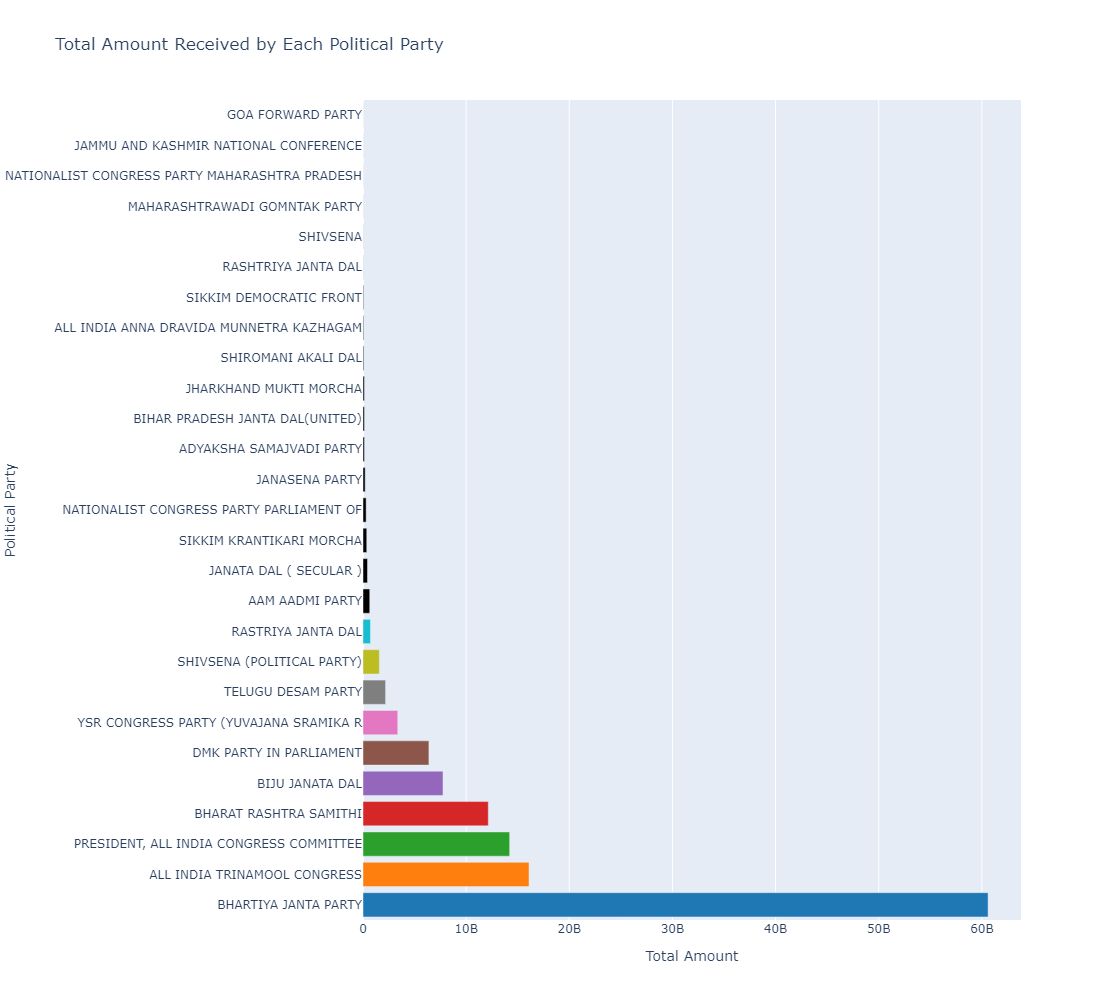

In [35]:
trace = go.Bar(
    y=total_amount_by_party.index,
    x=total_amount_by_party.values,
    orientation='h',
    marker=dict(
        color=['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)', 
               'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 'rgb(188, 189, 34)', 'rgb(23, 190, 207)']
    )
)
layout = go.Layout(
    title='Total Amount Received by Each Political Party',
    xaxis=dict(title='Total Amount'),
    yaxis=dict(title='Political Party'),
    width=800,
    height=1000 
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [9]:
total_sum = parties['Denomination'].sum()
print(total_sum)
total_sum = total_amount_by_party.sum()
percentage_by_party = (total_amount_by_party / total_sum) * 100
percentage_by_party.head()

127690893000.0


Name of the Political Party
BHARTIYA JANTA PARTY                       47.462360
ALL INDIA TRINAMOOL CONGRESS               12.604904
PRESIDENT, ALL INDIA CONGRESS COMMITTEE    11.135215
BHARAT RASHTRA SAMITHI                      9.512894
BIJU JANATA DAL                             6.073260
Name: Denomination, dtype: float64

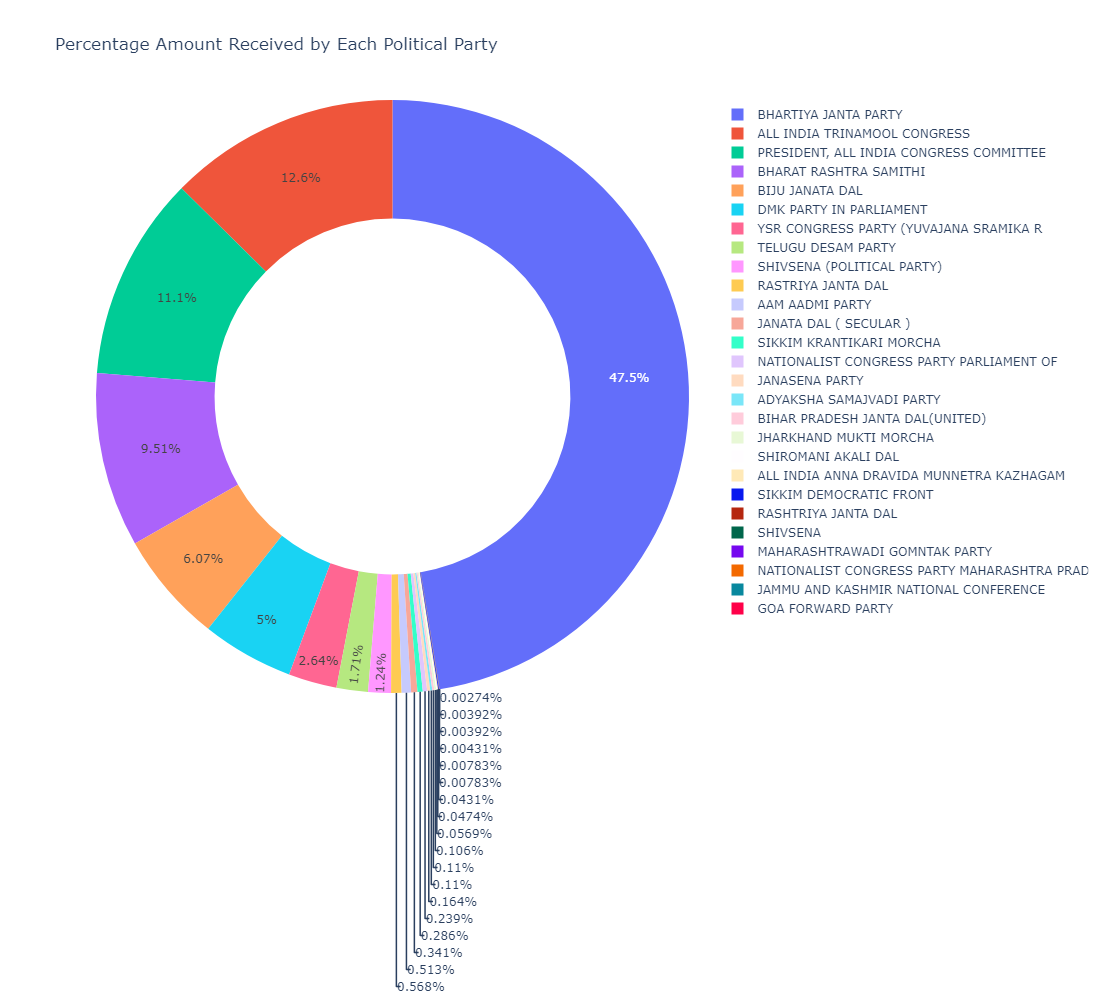

In [36]:
total_amount_by_par = parties.groupby('Name of the Political Party')['Denomination'].sum().reset_index().sort_values(by='Denomination',ascending=False)
fig = px.pie(total_amount_by_par, values='Denomination', names='Name of the Political Party', 
             title='Percentage Amount Received by Each Political Party',
             hover_data=['Denomination'], 
             labels={'Denomination': 'Denomination (Crore)'}, 
             hole=0.6,
             width=800, 
             height=1000)

# Show the plot
fig.show()

## Top donors companies 

In [11]:
# companies['Denomination'] = companies['Denomination'].apply(lambda x: x.replace(',', '') if isinstance(x, str) and ',' in x else x)
# companies['Denomination'] = pd.to_numeric(companies['Denomination'], errors='coerce')

In [12]:
companies[companies['Denomination'].isnull() == True]

,Date of Purchase,Purchaser Name,Denomination
55,NaN,NaN,NaN
112,NaN,NaN,NaN
169,NaN,NaN,NaN
226,NaN,NaN,NaN
283,NaN,NaN,NaN
...,...,...,...
18922,NaN,NaN,NaN
18979,NaN,NaN,NaN
19036,NaN,NaN,NaN
19093,NaN,NaN,NaN


In [13]:
top_donors_companies = companies.groupby('Purchaser Name')['Denomination'].sum().sort_values(ascending=False)
top_donors_companies.head()

Purchaser Name
FUTURE GAMING AND HOTEL SERVICES PR               1.208000e+10
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED    8.210000e+09
QWIKSUPPLYCHAINPRIVATELIMITED                     4.100000e+09
HALDIA ENERGY LIMITED                             3.770000e+09
VEDANTA LIMITED                                   3.756500e+09
Name: Denomination, dtype: float64

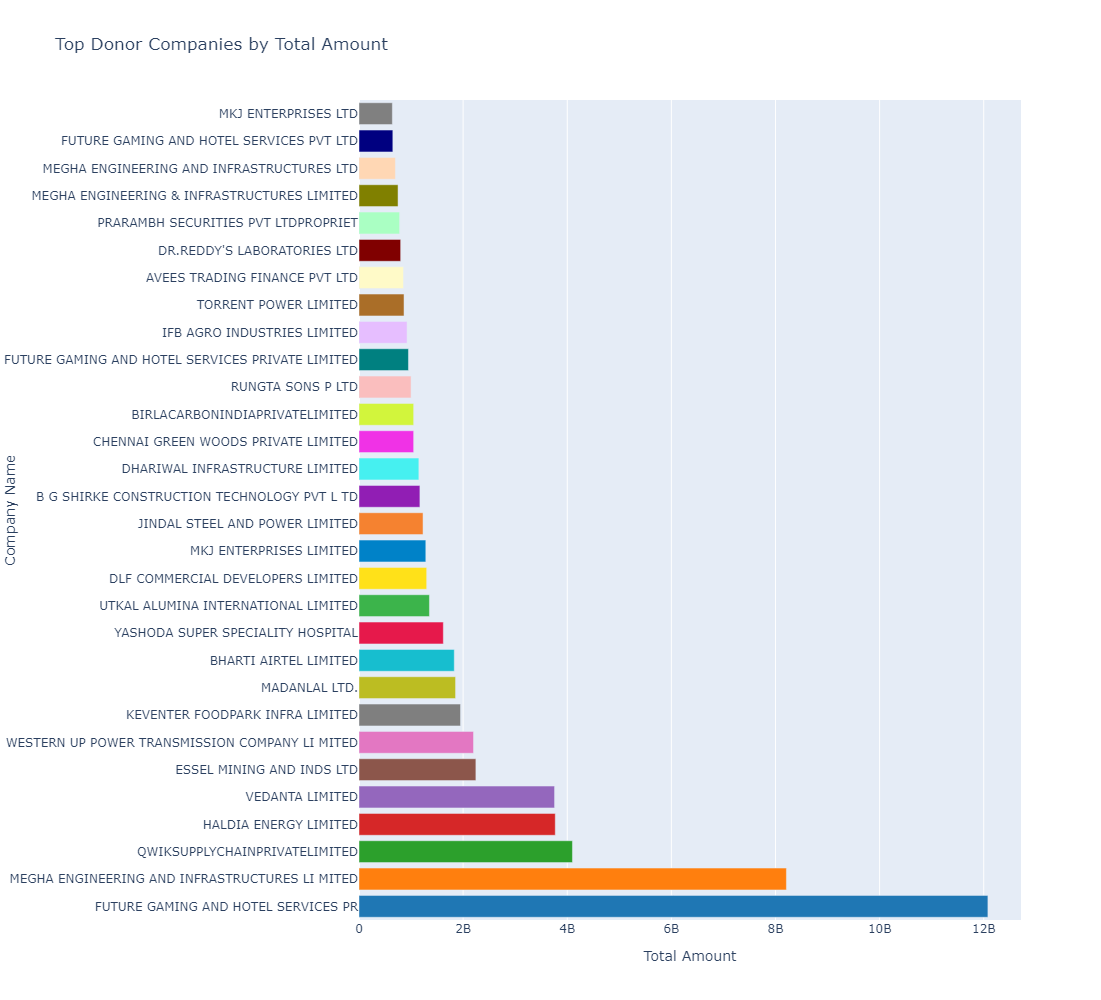

In [37]:
top_donors_companies = companies.groupby('Purchaser Name')['Denomination'].sum().sort_values(ascending=False).head(30)
trace = go.Bar(
    y=top_donors_companies.index,
    x=top_donors_companies.values,
    orientation='h',
    marker=dict(
    color = [
    'rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)', 
    'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 'rgb(188, 189, 34)', 'rgb(23, 190, 207)',
    'rgb(230, 25, 75)', 'rgb(60, 180, 75)', 'rgb(255, 225, 25)', 'rgb(0, 130, 200)', 'rgb(245, 130, 48)', 
    'rgb(145, 30, 180)', 'rgb(70, 240, 240)', 'rgb(240, 50, 230)', 'rgb(210, 245, 60)', 'rgb(250, 190, 190)',
    'rgb(0, 128, 128)', 'rgb(230, 190, 255)', 'rgb(170, 110, 40)', 'rgb(255, 250, 200)', 'rgb(128, 0, 0)', 
    'rgb(170, 255, 195)', 'rgb(128, 128, 0)', 'rgb(255, 215, 180)', 'rgb(0, 0, 128)', 'rgb(128, 128, 128)'
]
)
)

layout = go.Layout(
    title='Top Donor Companies by Total Amount',
    xaxis=dict(title='Total Amount'),
    yaxis=dict(title='Company Name'),
    width=800,
    height=1000
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()


In [15]:
total_sum_com = companies['Denomination'].sum()
total_sum_com = top_donors_companies.sum()
percentage_by_companies = (top_donors_companies / total_sum) * 100
percentage_by_companies.head()

Purchaser Name
FUTURE GAMING AND HOTEL SERVICES PR               9.460346
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED    6.429589
QWIKSUPPLYCHAINPRIVATELIMITED                     3.210879
HALDIA ENERGY LIMITED                             2.952442
VEDANTA LIMITED                                   2.941870
Name: Denomination, dtype: float64

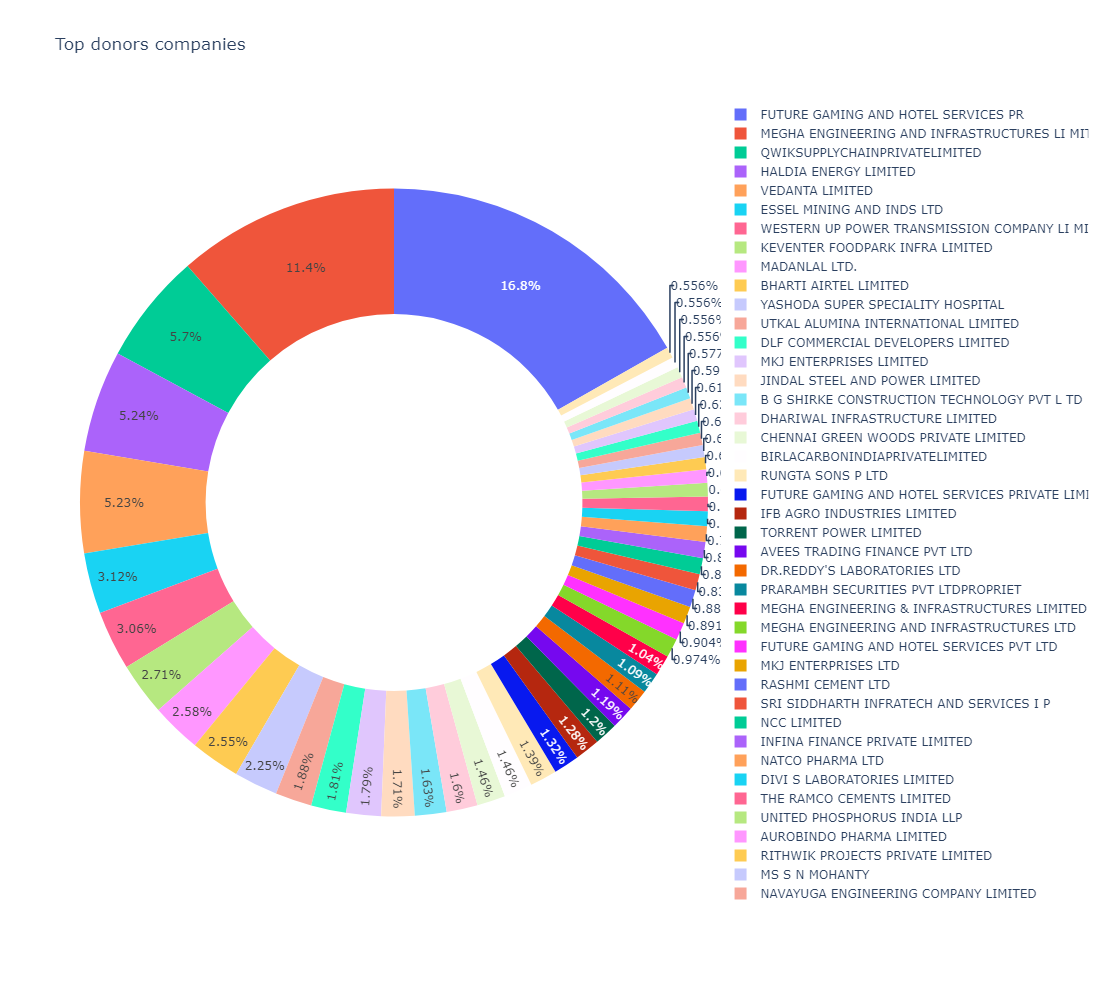

In [38]:
top_donors_com= companies.groupby('Purchaser Name')['Denomination'].sum().reset_index().sort_values(by='Denomination',ascending=False)
top_50_com = top_donors_com.head(50)
fig = px.pie(top_50_com, values='Denomination', names='Purchaser Name', 
             title='Top donors companies',
             hover_data=['Denomination'], 
             labels={'Denomination': 'Denomination (Crore)'}, 
             hole=0.6,
             width=800, 
             height=1000)

fig.show()

## Analysis of Denomination by Year

In [26]:
companies['Date of Purchase'] = pd.to_datetime(companies['Date of Purchase'])

In [18]:
companies['Month'] = companies['Date of Purchase'].dt.month
companies['Year'] = companies['Date of Purchase'].dt.year

In [19]:
companies['Date of Purchase'] = pd.to_datetime(companies['Date of Purchase'])

def amount_donated(specific_year):
    filtered_data = companies[companies['Date of Purchase'].dt.year == specific_year]
    amount_by_month = filtered_data.groupby(filtered_data['Date of Purchase'].dt.month)['Denomination'].sum()
    trace = go.Bar(
        x=amount_by_month.index,
        y=amount_by_month.values,
        marker=dict(color='skyblue'),
        text=amount_by_month.values,
        textposition='auto'
    )
    layout = go.Layout(
        title=f'Total Amount Donated by Month in {specific_year}',
        xaxis=dict(title='Month'),
        yaxis=dict(title='Total Amount Donated'),
        bargap=0.2,
        showlegend=False 
    )

    fig = go.Figure(data=[trace], layout=layout)

    fig.show()


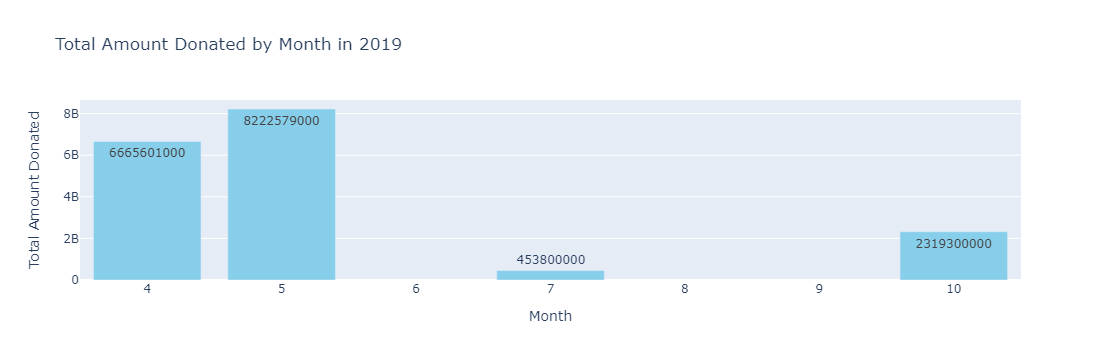

In [20]:
amount_donated(2019)

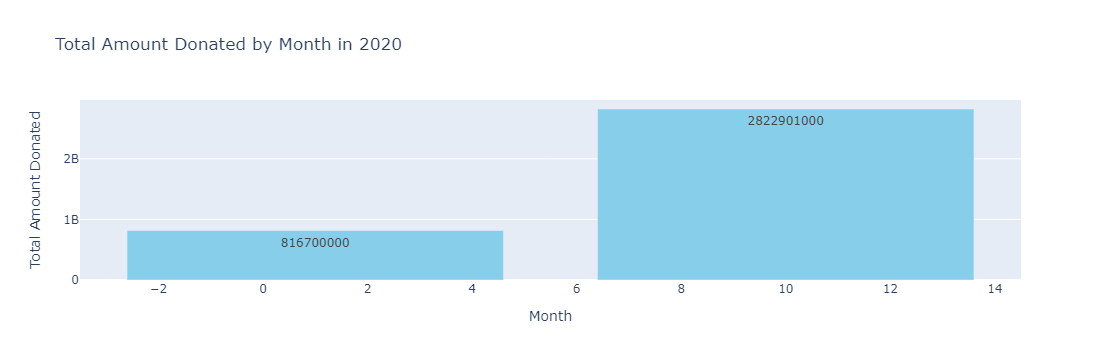

In [21]:
amount_donated(2020)

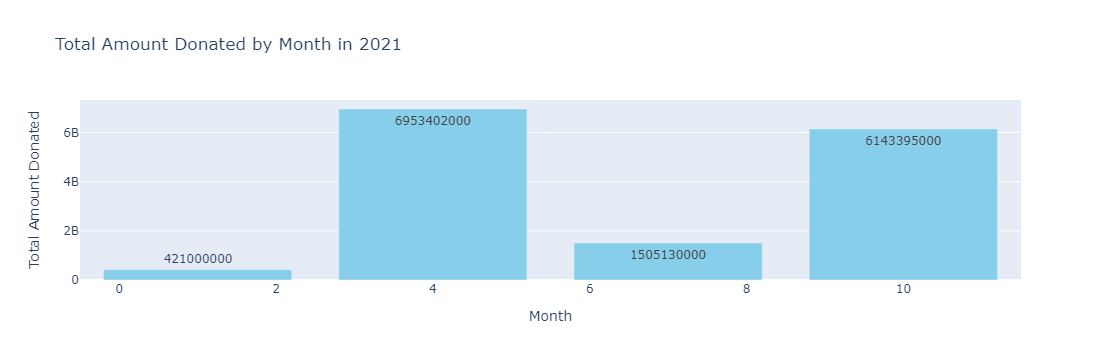

In [22]:
amount_donated(2021)

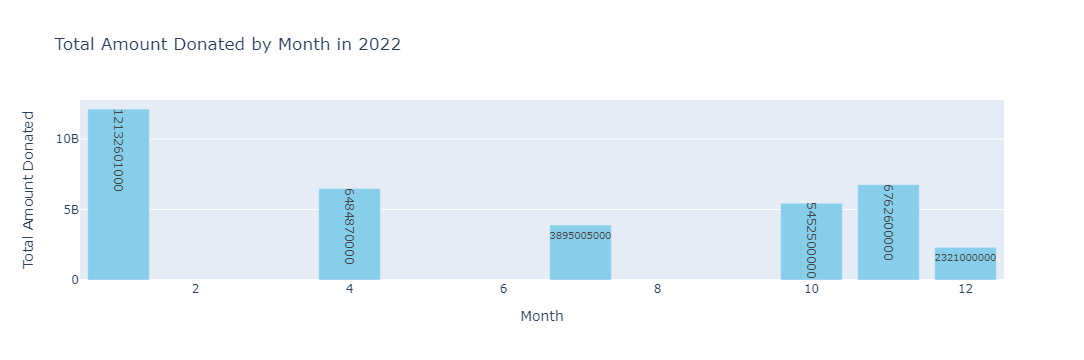

In [23]:
amount_donated(2022)

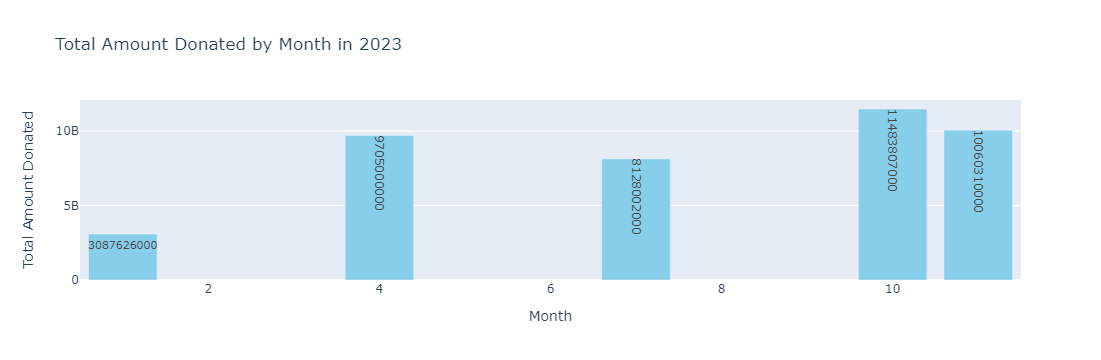

In [24]:
amount_donated(2023)

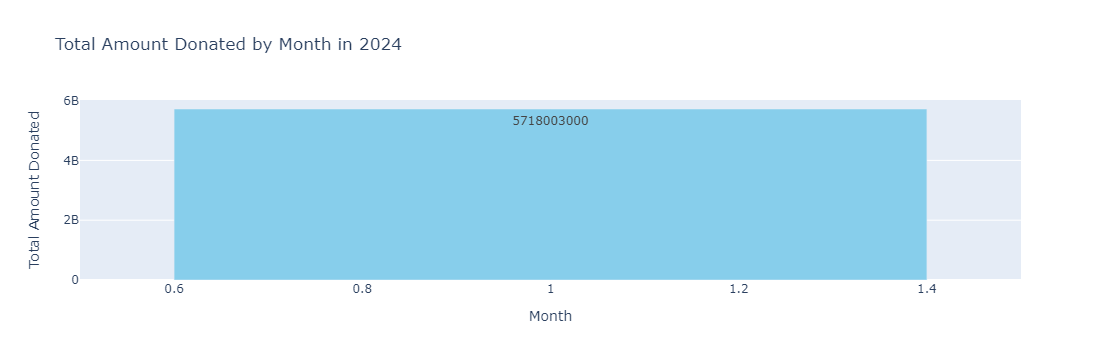

In [25]:
amount_donated(2024)